#Accessing Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, make_scorer

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df0 = pd.read_csv('https://archive.ics.uci.edu/static/public/492/data.csv')
df = pd.read_csv('https://raw.githubusercontent.com/ravi-shankar-verma/Metro-Interstate-Analysis/refs/heads/main/cleaned_data_metro_interstate_traffic_volume')

#EDA

##Summary Statistics

<details>
  <summary><font size="3" color="#ADD8E6"><b>Dataset Information</b></font></summary>
  
  **Dataset Source:**  [Metro Interstate Traffic Volume](https://archive.ics.uci.edu/dataset/492/metro+interstate+traffic+volume)
  
  **Description:** Hourly Minneapolis-St Paul, MN traffic volume for westbound I-94. Includes weather and holiday features from 2012-2018.
</details>

<details>
  <summary><font size="3" color="#ADD8E6"><b>Feature Attributes</b></font></summary>
  
  | Variable Name       | Role     | Type          | Description                                               | Units  | Missing Values |
  |---------------------|----------|---------------|-----------------------------------------------------------|--------|----------------|
  | **holiday**         | Feature  | Categorical   | US National holidays plus regional holiday, Minnesota State Fair | None   | No             |
  | **temp**            | Feature  | Continuous    | Average temp in Kelvin                                    | Kelvin | No             |
  | **rain_1h**         | Feature  | Continuous    | Amount in mm of rain that occurred in the hour            | mm     | No             |
  | **snow_1h**         | Feature  | Continuous    | Amount in mm of snow that occurred in the hour            | mm     | No             |
  | **clouds_all**      | Feature  | Integer       | Percentage of cloud cover                                 | %      | No             |
  | **weather_main**    | Feature  | Categorical   | Short textual description of the current weather          | None   | No             |
  | **weather_description** | Feature  | Categorical   | Longer textual description of the current weather         | None   | No             |
  | **date_time**       | Feature  | Date          | Hour of the data collected in local CST time              | None   | No             |
  | **traffic_volume**  | Target   | Integer       | Hourly I-94 ATR 301 reported westbound traffic volume     | None   | No             |
  
</details>


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48187 entries, 0 to 48186
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48187 non-null  object 
 1   temp                 48187 non-null  float64
 2   rain_1h              48187 non-null  float64
 3   snow_1h              48187 non-null  float64
 4   clouds_all           48187 non-null  int64  
 5   weather_main         48187 non-null  object 
 6   weather_description  48187 non-null  object 
 7   date_time            48187 non-null  object 
 8   traffic_volume       48187 non-null  int64  
 9   date                 48187 non-null  object 
 10  year                 48187 non-null  int64  
 11  month                48187 non-null  int64  
 12  week                 48187 non-null  int64  
 13  day                  48187 non-null  int64  
 14  hour                 48187 non-null  int64  
 15  day_of_week          48187 non-null 

In [ ]:
df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,date,year,month,week,day,hour,day_of_week
0,No Holiday,288.28,0.0,0.0,40,Clouds,cloudy,2012-10-02 09:00:00,5545,2012-10-02,2012,10,40,2,9,Tuesday
1,No Holiday,289.36,0.0,0.0,75,Clouds,cloudy,2012-10-02 10:00:00,4516,2012-10-02,2012,10,40,2,10,Tuesday
2,No Holiday,289.58,0.0,0.0,90,Clouds,cloudy,2012-10-02 11:00:00,4767,2012-10-02,2012,10,40,2,11,Tuesday
3,No Holiday,290.13,0.0,0.0,90,Clouds,cloudy,2012-10-02 12:00:00,5026,2012-10-02,2012,10,40,2,12,Tuesday
4,No Holiday,291.14,0.0,0.0,75,Clouds,cloudy,2012-10-02 13:00:00,4918,2012-10-02,2012,10,40,2,13,Tuesday


In [ ]:
df.describe(include='all')

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,date,year,month,week,day,hour,day_of_week
count,48187,48187.000000,48187.000000,48187.000000,48187.000000,48187,48187,48187,48187.000000,48187,48187.000000,48187.000000,48187.000000,48187.000000,48187.000000,48187
unique,12,NaN,NaN,NaN,NaN,11,6,40575,NaN,1860,NaN,NaN,NaN,NaN,NaN,7
top,No Holiday,NaN,NaN,NaN,NaN,Clouds,cloudy,2013-04-18 22:00:00,NaN,2012-12-16,NaN,NaN,NaN,NaN,NaN,Monday
freq,46759,NaN,NaN,NaN,NaN,15158,15158,6,NaN,81,NaN,NaN,NaN,NaN,NaN,7071
mean,NaN,281.204995,0.334382,0.000222,49.365451,NaN,NaN,NaN,3259.618134,NaN,2015.512047,6.505240,26.483865,15.736402,11.397742,NaN
std,NaN,13.338738,44.797033,0.008169,39.015213,NaN,NaN,NaN,1986.954465,NaN,1.893393,3.400285,14.842820,8.721687,6.940373,NaN
min,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,0.000000,NaN,2012.000000,1.000000,1.000000,1.000000,0.000000,NaN
25%,NaN,272.160000,0.000000,0.000000,1.000000,NaN,NaN,NaN,1192.500000,NaN,2014.000000,4.000000,14.000000,8.000000,5.000000,NaN
50%,NaN,282.450000,0.000000,0.000000,64.000000,NaN,NaN,NaN,3379.000000,NaN,2016.000000,7.000000,27.000000,16.000000,11.000000,NaN
75%,NaN,291.806000,0.000000,0.000000,90.000000,NaN,NaN,NaN,4933.000000,NaN,2017.000000,9.000000,39.000000,23.000000,17.000000,NaN


In [ ]:
df.shape

(48187, 16)

#Feature Engineering

##Target Variable

<summary><font size="3" color="#ADD8E6"><b>No need to manipulate target variable for regression problem.</b></font></summary>

In [ ]:
df['traffic_volume'].dtype

dtype('int64')

##Binary Encoding

<summary><font size="3" color="#ADD8E6"><b>I will binary encode all 0 values in the following columns:</b></font></summary>

* Rain_1h = No Rain
* Snow_1h = No Snow

In [ ]:
(df['rain_1h'] == 0).value_counts()

,count
rain_1h,
True,44720
False,3467


In [ ]:
(df['snow_1h'] == 0).value_counts()

,count
snow_1h,
True,48124
False,63


In [ ]:
df['no_rain'] = (df['rain_1h'] == 0).astype(int)
df['no_snow'] = (df['snow_1h'] == 0).astype(int)

In [ ]:
df['no_rain'].value_counts()

,count
no_rain,
1,44720
0,3467


In [ ]:
df['no_snow'].value_counts()

,count
no_snow,
1,48124
0,63


##Outlier Management

<summary><font size="3" color="#ADD8E6"><b>I use an interactive, combined histogram & boxplot to truncate outliers.</b></font></summary>

+ Temp = Clip lower & upper values (specifically clipping the 0 values identified during preprocessing).
+ Rain_1h = Specifically clipping the extreme upper outlier, also identified earlier.

In [ ]:
def hist_boxplot(df, feature, height=400, width=600, bins=50):

    fig = px.histogram(
        df,
        x=feature,
        nbins=bins,
        marginal='box',
        title=f'{feature} Distribution',
        height=height,
        width=width
    )

    fig.update_layout(
        title_x=0.45,
        margin=dict(l=20, r=20, t=50, b=20)
    )

    fig.show()

<summary><font size="3" color="#ADD8E6"><b>Temp (Before Truncation)</b></font></summary>

In [ ]:
hist_boxplot(df, 'temp')

<summary><font size="3" color="#ADD8E6"><b>Temp (After Truncation)</b></font></summary>

In [ ]:
df['temp'] = df['temp'].clip(lower=246, upper=305)
hist_boxplot(df, 'temp')

<summary><font size="3" color="#ADD8E6"><b>Rain (Before Truncation)</b></font></summary>

In [ ]:
hist_boxplot(df, 'rain_1h')

<summary><font size="3" color="#ADD8E6"><b>Rain (After Truncation)</b></font></summary>

In [ ]:
df['rain_1h'] = df['rain_1h'].clip(upper=1.74)
hist_boxplot(df, 'rain_1h')

##Bucketizing

<summary><font size="3" color="#ADD8E6"><b>Bucketizing Temperature as I previously identified an observable correlation during EDA.</b></font></summary>

In [ ]:
df['temp_bin'] = pd.qcut(df['temp'], q=4, labels=False)

In [ ]:
df['temp_bin'].value_counts()

,count
temp_bin,
0,12049
1,12048
2,12045
3,12045


##Integer Encoding

A necessary step to make data usable for modeling. I will int encode the following features:
+ Holiday
+ Weather
+ Day of Week

<summary><font size="3" color="#ADD8E6"><b>Holiday</b></font></summary>


| Holiday Name                   | Code |
|--------------------------------|------|
| **No Holiday**                 | 0    |
| **Columbus Day**               | 1    |
| **Veterans Day**               | 2    |
| **Thanksgiving Day**           | 3    |
| **Christmas Day**              | 4    |
| **New Year's Day**             | 5    |
| **Washington's Birthday**      | 6    |
| **Memorial Day**               | 7    |
| **Independence Day**           | 8    |
| **State Fair**                 | 9    |
| **Labor Day**                  | 10   |
| **Martin Luther King Jr. Day** | 11   |


In [ ]:
holidays = df['holiday'].unique().tolist()

In [ ]:
holiday_to_number = {}
for i, holiday in enumerate(holidays):
  holiday_to_number[holiday] = i
holiday_to_number

{'No Holiday': 0,
 'Columbus Day': 1,
 'Veterans Day': 2,
 'Thanksgiving Day': 3,
 'Christmas Day': 4,
 'New Years Day': 5,
 'Washingtons Birthday': 6,
 'Memorial Day': 7,
 'Independence Day': 8,
 'State Fair': 9,
 'Labor Day': 10,
 'Martin Luther King Jr Day': 11}

In [ ]:
df['holiday_int'] = df['holiday'].map(holiday_to_number)
df['holiday_int'].value_counts().sort_index()

,count
holiday_int,
0,46759
1,112
2,120
3,135
4,167
5,114
6,136
7,134
8,126


<summary><font size="3" color="#ADD8E6"><b>Weather</b></font></summary>

| Weather Condition | Code |
|-------------------|------|
| Cloudy           | 0    |
| Clear            | 1    |
| Rain             | 2    |
| Foggy            | 3    |
| Storm            | 4    |
| Snow             | 5    |

In [ ]:
weather_list = df['weather_description'].unique().tolist()

In [ ]:
weather_to_int = {}
for i, weather_description in enumerate(weather_list):
  weather_to_int[weather_description] = i
weather_to_int

{'cloudy': 0, 'clear': 1, 'rain': 2, 'foggy': 3, 'storm': 4, 'snow': 5}

In [ ]:
df['weather_int'] = df['weather_description'].map(weather_to_int)
df['weather_int'].value_counts()

,count
weather_int,
0,15158
1,13384
3,8241
2,7490
5,2877
4,1037


<summary><font size="3" color="#ADD8E6"><b>Day of Week</b></font></summary>

| Day        | Code |
|------------|------|
| Tuesday    | 0    |
| Wednesday  | 1    |
| Thursday   | 2    |
| Friday     | 3    |
| Saturday   | 4    |
| Sunday     | 5    |
| Monday     | 6    |

In [ ]:
day_of_week_list = df['day_of_week'].unique().tolist()

In [ ]:
day_of_week_to_int = {}
for i, day_of_week in enumerate(day_of_week_list):
  day_of_week_to_int[day_of_week] = i
day_of_week_to_int

{'Tuesday': 0,
 'Wednesday': 1,
 'Thursday': 2,
 'Friday': 3,
 'Saturday': 4,
 'Sunday': 5,
 'Monday': 6}

In [ ]:
df['day_of_week_int'] = df['day_of_week'].map(day_of_week_to_int)
df['day_of_week_int'].value_counts().sort_index()

,count
day_of_week_int,
0,6844
1,6926
2,6816
3,6830
4,6830
5,6870
6,7071


##One Hot encoding

In [ ]:
# No need to drop_first values with tree based models
df = pd.get_dummies(df, columns=['day_of_week','weather_description','holiday'], drop_first=False)

##Engineered Dataframe

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48187 entries, 0 to 48186
Data columns (total 44 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   temp                               48187 non-null  float64
 1   rain_1h                            48187 non-null  float64
 2   snow_1h                            48187 non-null  float64
 3   clouds_all                         48187 non-null  int64  
 4   weather_main                       48187 non-null  object 
 5   date_time                          48187 non-null  object 
 6   traffic_volume                     48187 non-null  int64  
 7   date                               48187 non-null  object 
 8   year                               48187 non-null  int64  
 9   month                              48187 non-null  int64  
 10  week                               48187 non-null  int64  
 11  day                                48187 non-null  int

#Modeling

<summary><font size="3" color="#ADD8E6"><b>Assigning X & y</b></font></summary>

In [ ]:
features = [col for col in df.columns if col not in ['traffic_volume','holiday','weather_main','weather_description','date_time','date']]
target = ['traffic_volume']

X = df[features]
y = df[target]

<summary><font size="3" color="#ADD8E6"><b>Train Test Split</b></font></summary>

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_tr, X_ts, y_tr, y_ts = train_test_split(X, y, test_size=.25, random_state=42)

In [ ]:
print(f"""Train Test Split Shape:
X_train: {X_tr.shape} | X_test: {X_ts.shape}
y_train: {y_tr.shape} | y_test: {y_ts.shape}""")

Train Test Split Shape:
X_train: (36140, 40) | X_test: (12047, 40)
y_train: (36140, 1) | y_test: (12047, 1)


<summary><font size="3" color="#ADD8E6"><b>Standardization</b></font></summary>

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
std_scaler = StandardScaler().fit(X_tr)
X_tr = std_scaler.transform(X_tr)
X_ts = std_scaler.transform(X_ts)

##Decision Trees

<summary><font size="3" color="#ADD8E6"><b>Score</b></font></summary>

In [ ]:
DT = DecisionTreeRegressor(random_state=42)
DT.fit(X_tr, y_tr)
pred_DT = DT.predict(X_ts)
print(f'train_score_DT: {(DT_Train_Score := DT.score(X_tr, y_tr))}')
print(f'test_score_DT: {(DT_Test_Score := DT.score(X_ts, y_ts))}')

train_score_DT: 1.0
test_score_DT: 0.9577818878356159


<summary><font size="3" color="#ADD8E6"><b>Prediction Plot</b></font></summary>

<Axes: xlabel='traffic_volume'>

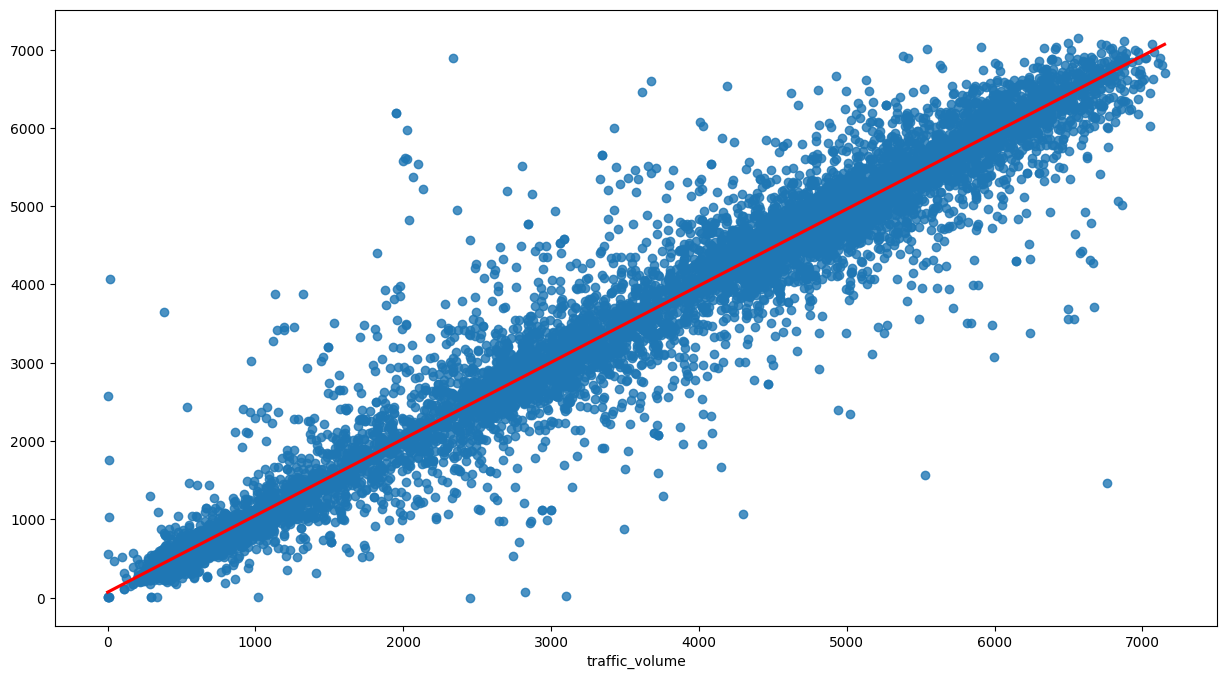

In [ ]:
plt.figure(figsize=(15,8))
sns.regplot(x=y_ts, y=pred_DT, line_kws={'color': 'red'})

<summary><font size="3" color="#ADD8E6"><b>Hyperparameter Tuning</b></font></summary>

In [ ]:
parameter ={'max_depth':np.arange(1,20)}
GS=GridSearchCV(DT,parameter,cv=3)
GS.fit(X_tr,y_tr)

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [ ]:
GS.best_params_

{'max_depth': 11}

<summary><font size="3" color="#ADD8E6"><b>Tuned Score</b></font></summary>

In [ ]:
DT_tuned = DecisionTreeRegressor(criterion = 'squared_error', max_depth=11, random_state=42)
DT_tuned.fit(X_tr, y_tr)
pred_DT_Tuned = DT_tuned.predict(X_ts)
print(f'train_score_DT_Tuned = {(DT_Tuned_Train_Score:= DT_tuned.score(X_tr, y_tr))}')
print(f'test_score_DT_Tuned = {(DT_Tuned_Test_Score:= DT_tuned.score(X_ts, y_ts))}')

train_score_DT_Tuned = 0.9675493252111207
test_score_DT_Tuned = 0.9586974594398646


<summary><font size="3" color="#ADD8E6"><b>Tuned Prediction Plot</b></font></summary>

<Axes: xlabel='traffic_volume'>

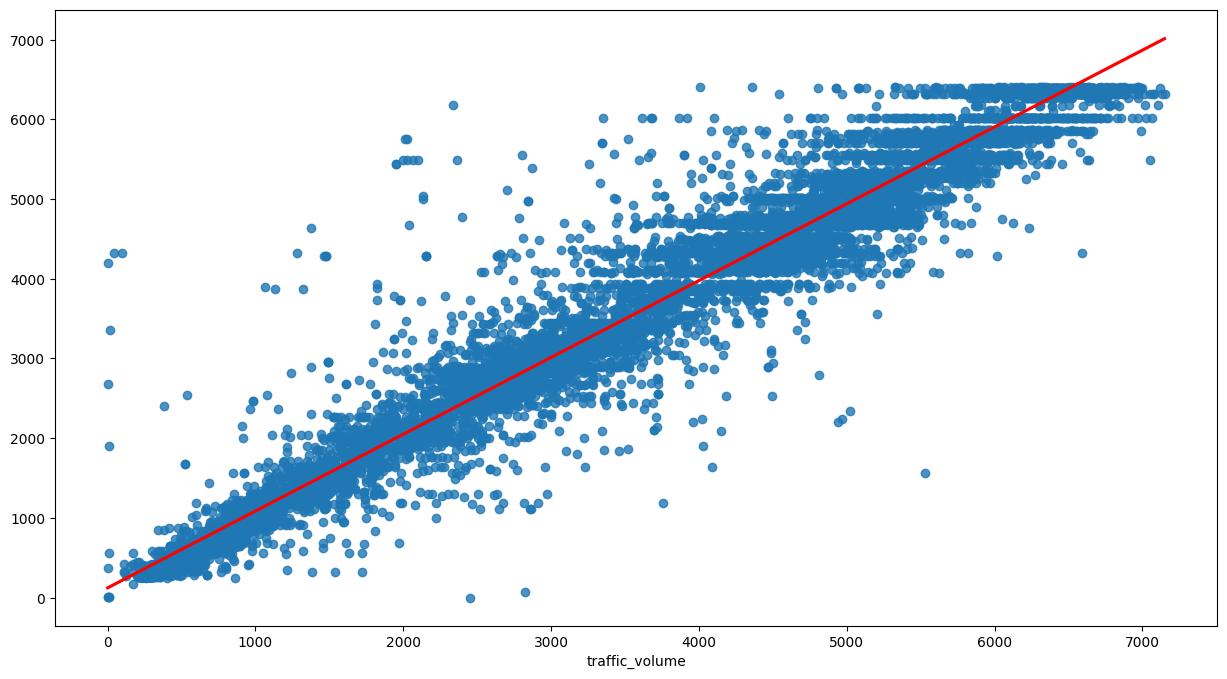

In [ ]:
plt.figure(figsize=(15,8))
sns.regplot(x=y_ts, y=pred_DT_Tuned, line_kws={'color': 'red'})

##Random Forest

<summary><font size="3" color="#ADD8E6"><b>Score</b></font></summary>

In [ ]:
RT = RandomForestRegressor(random_state=42)
RT.fit(X_tr, y_tr)
pred_RT = RT.predict(X_ts)
print(f'train_score_RT = {(RT_Train_Score := RT.score(X_tr, y_tr))}')
print(f'test_score_RT = {(RT_Test_Score := RT.score(X_ts, y_ts))}')

train_score_RT = 0.9965005932238141
test_score_RT = 0.9760532209807851


<summary><font size="3" color="#ADD8E6"><b>Prediction Plot</b></font></summary>

<Axes: xlabel='traffic_volume'>

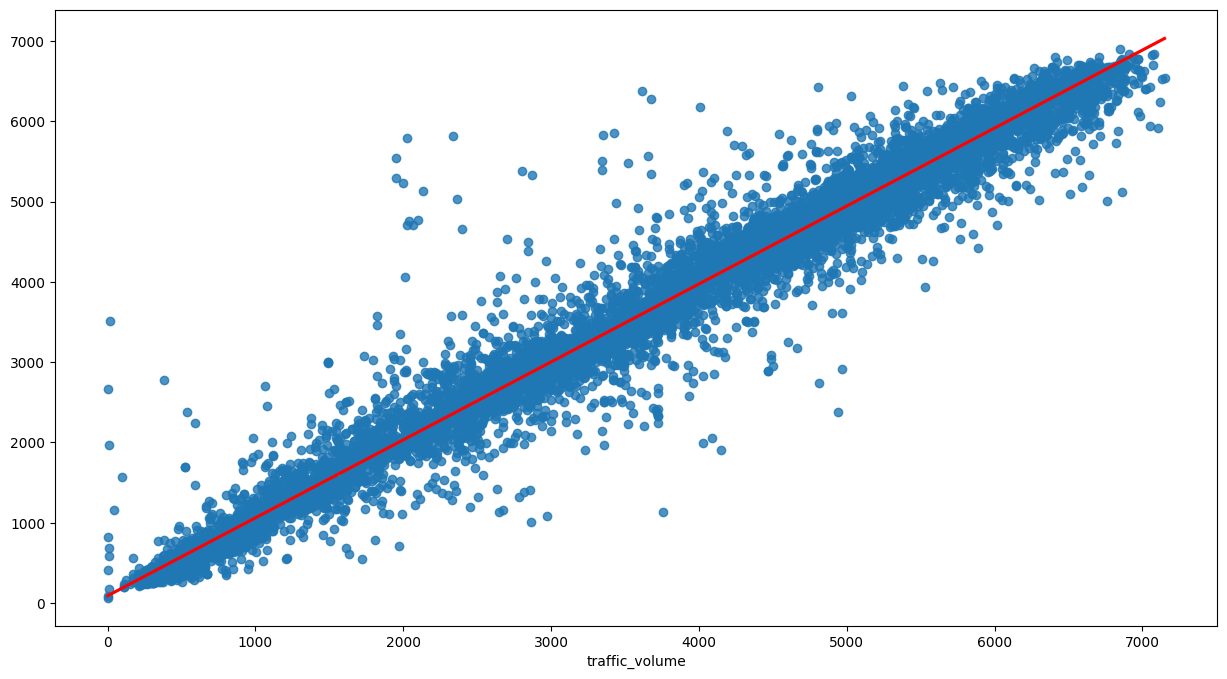

In [ ]:
plt.figure(figsize=(15,8))
sns.regplot(x=y_ts, y=pred_RT, line_kws={'color': 'red'})

<summary><font size="3" color="#ADD8E6"><b>Hyperparameter Tuning</b></font></summary>

In [ ]:
parameter = {'max_depth':np.arange(1,20),'n_estimators':np.arange(1,15)}
GS=GridSearchCV(RT,parameter,cv=3)
GS.fit(X_tr,y_tr)

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                         'n_estimators': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])})

In [ ]:
GS.best_params_

{'max_depth': 19, 'n_estimators': 14}

<summary><font size="3" color="#ADD8E6"><b>Tuned Score</b></font></summary>

In [ ]:
RT_tuned = RandomForestRegressor(max_depth=19, n_estimators=14, random_state=42)
RT_tuned.fit(X_tr, y_tr)
pred_RT_Tuned = RT_tuned.predict(X_ts)
print(f'train_score_RT = {(RT_Tuned_Train_Score := RT_tuned.score(X_tr, y_tr))}')
print(f'test_score_RT = {(RT_Tuned_Test_Score := RT_tuned.score(X_ts, y_ts))}')

train_score_RT = 0.9942850649199105
test_score_RT = 0.974141767027524


<summary><font size="3" color="#ADD8E6"><b>Alternative Tuning Method</b></font></summary>

*The below is a more comprehensive tuning method. The reason I have not used it here is because it is computationally expensive. Since the current score is reasonable and our dataframe is quite large, I opt for the simpler tuning paramater adopted in this model.*

In [ ]:
# model = RandomForestRegressor()

# param_grid = {'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
#               'max_depth': [10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70],
#               'max_features': [.1, .2, .3, .4, .5, .6, .7, .8, .9, 1],
#               'bootstrap': [True, False]}

# scorer = make_scorer(r2_score)

# grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring=scorer)

# grid_search.fit(X_tr, y_tr)

# print(grid_search.best_params_)

<summary><font size="3" color="#ADD8E6"><b>Tuned Prediction Plot</b></font></summary>

<Axes: xlabel='traffic_volume'>

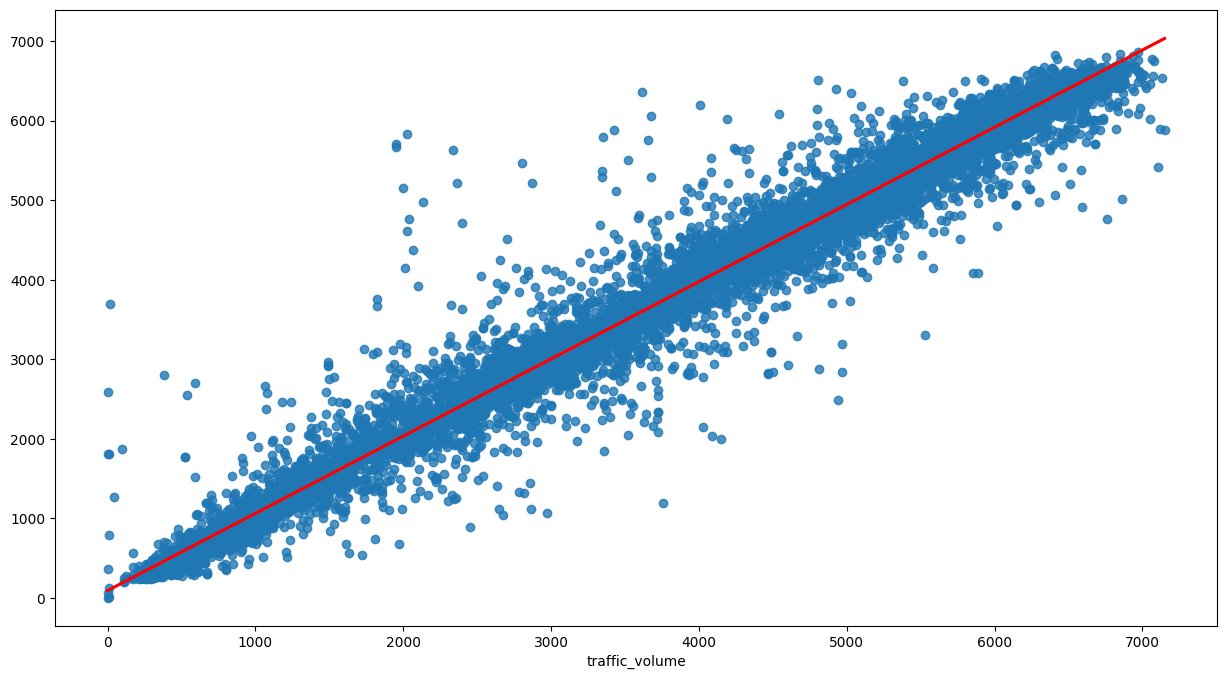

In [ ]:
plt.figure(figsize=(15,8))
sns.regplot(x=y_ts, y=pred_RT_Tuned, line_kws={'color': 'red'})

##Extra Trees

<summary><font size="3" color="#ADD8E6"><b>Score</b></font></summary>

In [ ]:
ET = ExtraTreesRegressor(random_state=42).fit(X_tr,y_tr)
ET.fit(X_tr, y_tr)
pred_ET = ET.predict(X_ts)
print(f'Train Score: {(ET_Train_Score := ET.score(X_tr, y_tr))}')
print(f'Test Score: {(ET_Test_Score := ET.score(X_ts, y_ts))}')

Train Score: 0.9999999985974033
Test Score: 0.9730545647509898


<summary><font size="3" color="#ADD8E6"><b>Prediction Plot</b></font></summary>

<Axes: xlabel='traffic_volume'>

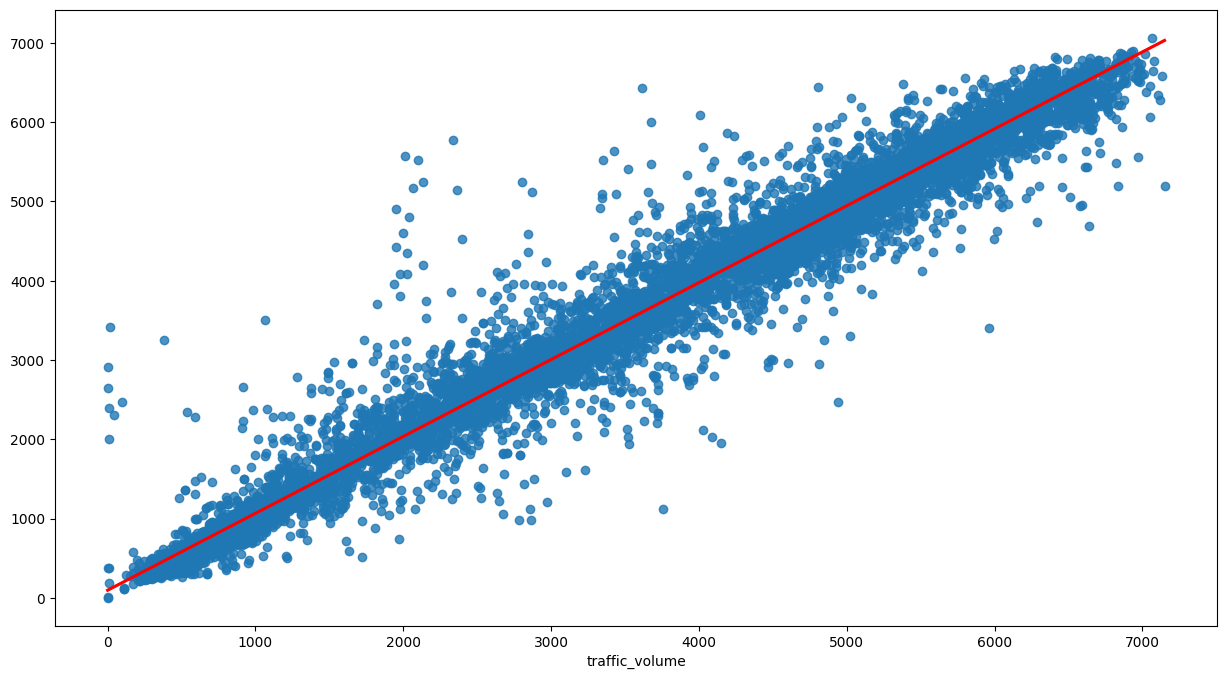

In [ ]:
plt.figure(figsize=(15,8))
sns.regplot(x=y_ts, y=pred_ET, line_kws={'color': 'red'})

#Summary

In [ ]:
train_scores = [DT_Train_Score, DT_Tuned_Train_Score, RT_Train_Score, RT_Tuned_Train_Score, ET_Train_Score]
test_score = [DT_Test_Score, DT_Tuned_Test_Score, RT_Test_Score, RT_Tuned_Test_Score, ET_Test_Score]
model = ['Decision Trees', 'Decision Trees Tuned', 'Random Forest', 'Random Forest Tuned', 'Extra Trees']

dict_scores = {'train_scores':train_scores, 'test_score': test_score}

In [ ]:
pd.DataFrame(dict_scores, index=model).sort_values('test_score', ascending=False)

,train_scores,test_score
Random Forest,0.996501,0.976053
Random Forest Tuned,0.994285,0.974142
Extra Trees,1.000000,0.973055
Decision Trees Tuned,0.967549,0.958697
Decision Trees,1.000000,0.957782


In [ ]:
def adjusted_r_squared(r_squared, n, k):
    print(f'r_squared = {r_squared}')
    print(f'rows = {n}')
    print(f'features = {k}')
    adjusted_r_squared = 1 - ((1 - r_squared) * (n - 1) / (n - k - 1))
    print(f'adjusted_r_squared = {adjusted_r_squared}')
    return

<summary><font size="3" color="#ADD8E6"><b>Adjusted R² Score</b></font></summary>

In [ ]:
adjusted_r_squared(RT_Test_Score, X_ts.shape[0], len(features))

r_squared = 0.9760532209807851
rows = 12047
features = 40
adjusted_r_squared = 0.9759734382754071


<summary><font size="3" color="#ADD8E6"><b>Conclusion</b></font></summary>

+ As can be seen in above Dataframe, the most accurate model was achieved with 'Random Forest', closely followed by Extra Trees and then 'Decision Trees'.

+ The overall variance between the scores amounts to '0.019' in R2.

+ Tuning methods used were largely insignificant. However, more thorough tuning methods may have been able to yield better results. But, since the R2 score can reach 0.97, I opted for a less comprehensive, and therefore potentially less impactful tuning method.